# PyTorch scratchpad - back to basics

In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
tensor_example = torch.tensor(np.array([[1,2,3],[4,5,6]]))

In [3]:
print(f"Shape of tensor: {tensor_example.shape}")
print(f"Data type of tensor: {tensor_example.dtype}")
print(tensor_example)

Shape of tensor: torch.Size([2, 3])
Data type of tensor: torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


In [4]:
import torch

# Creating two tensors
tensor_a = torch.tensor([[1, 2], [3, 4]], dtype=torch.int32)
tensor_b = torch.tensor([[5, 6], [7, 8]], dtype=torch.int32)

# Tensor addition
tensor_sum = torch.add(tensor_a, tensor_b)
print(f"Tensor Addition:\n{tensor_sum}")

Tensor Addition:
tensor([[ 6,  8],
        [10, 12]], dtype=torch.int32)


In [5]:
# Element-wise Multiplication
tensor_product = torch.mul(tensor_a, tensor_b)
print(f"Element-wise Multiplication:\n{tensor_product}")

# Matrix Multiplication
tensor_c = torch.tensor([[1], [2]], dtype=torch.int32) # 2x1 tensor
tensor_matmul = torch.matmul(tensor_a, tensor_c)
print(f"Matrix Multiplication:\n{tensor_matmul}")

Element-wise Multiplication:
tensor([[ 5, 12],
        [21, 32]], dtype=torch.int32)
Matrix Multiplication:
tensor([[ 5],
        [11]], dtype=torch.int32)


In [6]:
tensor_add_scaler = tensor_a + 5

In [7]:
print(tensor_a.shape)
print(tensor_c.shape)
print((tensor_a + tensor_c).shape)

torch.Size([2, 2])
torch.Size([2, 1])
torch.Size([2, 2])


In [8]:
print(tensor_a.shape)
print(tensor_c.shape)
print((tensor_a * tensor_c).shape)

torch.Size([2, 2])
torch.Size([2, 1])
torch.Size([2, 2])


In [9]:
tensor_a = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [10]:
tensor_a.view(3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [11]:
tensor_a.view(-1)

tensor([1, 2, 3, 4, 5, 6])

## Dataset basics

In [12]:
# Define a simple array as input data
X = np.array([[1.0, 2.0], [2.0, 1.0], [3.0, 4.0], [4.0, 3.0]])
# Define the target outputs for our dataset
y = np.array([0, 1, 0, 1])

In [13]:
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

In [14]:
from torch.utils.data import TensorDataset

dataset = TensorDataset(X_tensor, y_tensor)

In [15]:
# Print x and y of the TensorDataset
for i in range(len(dataset)):
    X_sample, y_sample = dataset[i]
    print(f"X[{i}]: {X_sample}, y[{i}]: {y_sample}")

X[0]: tensor([1., 2.], dtype=torch.float64), y[0]: 0
X[1]: tensor([2., 1.], dtype=torch.float64), y[1]: 1
X[2]: tensor([3., 4.], dtype=torch.float64), y[2]: 0
X[3]: tensor([4., 3.], dtype=torch.float64), y[3]: 1


In [16]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [17]:
for batch_X, batch_y in dataloader:
    print(f"Batch X:\n{batch_X}")
    print(f"Batch y:\n{batch_y}\n")

Batch X:
tensor([[1., 2.],
        [4., 3.]], dtype=torch.float64)
Batch y:
tensor([0, 1])

Batch X:
tensor([[3., 4.],
        [2., 1.]], dtype=torch.float64)
Batch y:
tensor([0, 1])



## NN in torch

In [18]:
import torch.nn as nn

input_tensor = torch.tensor([[1.0, 2.0]], dtype=torch.float32)
input_tensor.shape

layer = nn.Linear(in_features=2, out_features=3)
output_tensor = layer(input_tensor)
relu = nn.ReLU()
output = relu(output_tensor)

output

tensor([[0., 0., 0.]], grad_fn=<ReluBackward0>)

In [19]:
sigmoid = nn.Sigmoid()
output = sigmoid(output_tensor)
output

tensor([[0.1468, 0.3293, 0.3306]], grad_fn=<SigmoidBackward0>)

In [20]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(in_features=10, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

In [21]:
model_simple_nn = SimpleNN()
print(model_simple_nn)

SimpleNN(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [22]:
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Sigmoid()
)


In [23]:
# Input features [Average Goals Scored, Average Goals Conceded by Opponent]
X = torch.tensor([
    [3.0, 0.5], [1.0, 1.0], [0.5, 2.0], [2.0, 1.5],
    [3.5, 3.0], [2.0, 2.5], [1.5, 1.0], [0.5, 0.5],
    [2.5, 0.8], [2.1, 2.0], [1.2, 0.5], [0.7, 1.5]
], dtype=torch.float32)

# Target outputs [1 if the team is likely to win, 0 otherwise]
y = torch.tensor([[1], [0], [0], [1], [1], [0], [1], [0], [1], [0], [1], [0]], dtype=torch.float32)

print(X.shape)
print(y.shape)

torch.Size([12, 2])
torch.Size([12, 1])


In [24]:
# Training basic model
import torch.optim as optim
from tqdm import tqdm

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in tqdm(range(500)):
    model.train()
    optimizer.zero_grad()

    output = model(X)
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:  # Print every 10 epochs
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")  # Print epoch loss


100%|█████████████████████████████████████| 500/500 [00:00<00:00, 3914.66it/s]

Epoch 100, Loss: 0.09754963964223862
Epoch 200, Loss: 0.025958335027098656
Epoch 300, Loss: 0.01101890578866005
Epoch 400, Loss: 0.006039989646524191
Epoch 500, Loss: 0.003809058340266347


In [25]:
model.eval()

new_input = torch.tensor([[4.0, 5.0]], dtype=torch.float32)

with torch.no_grad():
    prediction = model(new_input)

print("Prediction:", (prediction > 0.5).int().item())

Prediction: 0


In [26]:
# Test Features
X_test = torch.tensor([[2.5, 1.0], [0.8, 0.8], [1.0, 2.0], [3.0, 2.5]], dtype=torch.float32)
# Test Targets
y_test = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)

In [27]:
from sklearn.metrics import accuracy_score

model.eval()

with torch.no_grad():
    output = model(X_test)
    predictions = (output > 0.5).int()
    test_loss = criterion(output, y_test).item()
    accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
print(f'accuracy -> {accuracy}, test loss -> {test_loss}')

accuracy -> 1.0, test loss -> 0.0020246414933353662


## More modeling

In [28]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [29]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Display the shapes of the resulting splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (124, 13)
Shape of X_test: (54, 13)
Shape of y_train: (124,)
Shape of y_test: (54,)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [32]:
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)
model

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)

In [33]:
import torch.optim as optim
from tqdm import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs, num_epochs = 150, 150
history = {'loss': [], 'val_loss': []}
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)

    loss.backward()
    optimizer.step()

    history['loss'].append(loss.item())
    with torch.no_grad():
        outputs_val = model(X_test_tensor)
        val_loss = criterion(outputs_val, y_test_tensor)  
        history['val_loss'].append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')


100%|█████████████████████████████████████| 150/150 [00:00<00:00, 2621.75it/s]

Epoch [10/150], Loss: 1.0561, Validation Loss: 1.0587
Epoch [20/150], Loss: 1.0321, Validation Loss: 1.0311
Epoch [30/150], Loss: 1.0061, Validation Loss: 1.0011
Epoch [40/150], Loss: 0.9751, Validation Loss: 0.9659
Epoch [50/150], Loss: 0.9365, Validation Loss: 0.9226
Epoch [60/150], Loss: 0.8897, Validation Loss: 0.8702
Epoch [70/150], Loss: 0.8342, Validation Loss: 0.8090
Epoch [80/150], Loss: 0.7696, Validation Loss: 0.7394
Epoch [90/150], Loss: 0.6990, Validation Loss: 0.6644
Epoch [100/150], Loss: 0.6246, Validation Loss: 0.5871
Epoch [110/150], Loss: 0.5505, Validation Loss: 0.5102
Epoch [120/150], Loss: 0.4802, Validation Loss: 0.4379
Epoch [130/150], Loss: 0.4154, Validation Loss: 0.3731
Epoch [140/150], Loss: 0.3569, Validation Loss: 0.3162
Epoch [150/150], Loss: 0.3046, Validation Loss: 0.2675


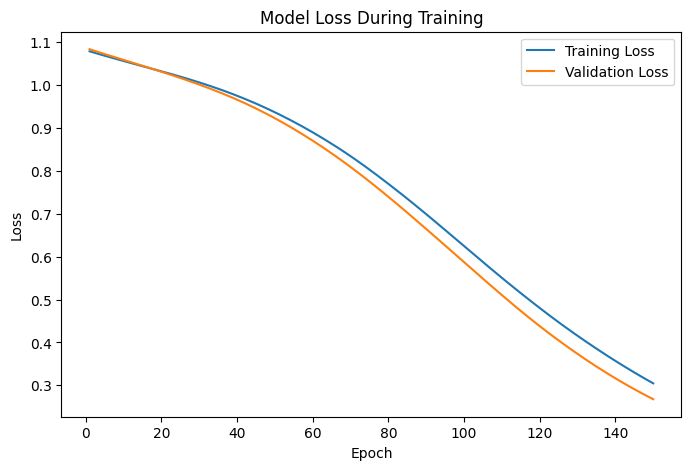

In [34]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [35]:
# Save the entire model
torch.save(model, 'wine_model.pth')

In [36]:
# Load the entire model
loaded_model = torch.load('wine_model.pth')
loaded_model.eval()

/var/folders/gq/vqns5pwd6kn4114tmrmys3vm0000gn/T/ipykernel_14263/797054402.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('wine_model.pth')


Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)

In [37]:
from sklearn.metrics import accuracy_score 

with torch.no_grad():
    model.eval()
    original_outputs = model(X_test_tensor)
    loaded_outputs = loaded_model(X_test_tensor)
    _, orig_predicted = torch.max(original_outputs, 1)
    _, loaded_predicted = torch.max(loaded_outputs, 1)
    orig_accuracy = accuracy_score(y_test_tensor, orig_predicted)
    predicted_accuracy = accuracy_score(y_test_tensor, loaded_predicted)

print(f'Original Model Accuracy: {orig_accuracy:.4f}')
print(f'Loaded Model Accuracy: {predicted_accuracy:.4f}')

Original Model Accuracy: 0.9815
Loaded Model Accuracy: 0.9815


## More techniques

In [38]:
from sklearn.datasets import load_wine

wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

In [41]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [42]:
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(13, 10),  
    nn.ReLU(),  
    nn.Linear(10, 10),  
    nn.ReLU(),  
    nn.Linear(10, 3)  
)

criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)  

In [44]:
from tqdm import tqdm

num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()

        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        loss.backward()
        optimizer.step()

        print(f'Batch Loss: {loss.item():.4f}')
        running_loss += loss.item() / batch_X.size(0)
    epoch_loss = running_loss / len(data_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}] Average Loss: {epoch_loss:.4f}')

 85%|█████████████████████████████████▏     | 85/100 [00:00<00:00, 426.08it/s]

Batch Loss: 23.1592
Batch Loss: 21.9450
Batch Loss: 19.8332
Batch Loss: 22.6680
Batch Loss: 19.3348
Batch Loss: 16.3935
Epoch [1/100] Average Loss: 0.0239
Batch Loss: 20.6162
Batch Loss: 19.5672
Batch Loss: 14.2321
Batch Loss: 14.9091
Batch Loss: 12.1584
Batch Loss: 7.7981
Epoch [2/100] Average Loss: 0.0167
Batch Loss: 10.2776
Batch Loss: 10.6479
Batch Loss: 10.7863
Batch Loss: 10.9071
Batch Loss: 10.2963
Batch Loss: 9.5774
Epoch [3/100] Average Loss: 0.0123
Batch Loss: 7.8722
Batch Loss: 8.4222
Batch Loss: 6.5882
Batch Loss: 6.5179
Batch Loss: 4.2761
Batch Loss: 7.3019
Epoch [4/100] Average Loss: 0.0082
Batch Loss: 6.1344
Batch Loss: 5.4473
Batch Loss: 4.1562
Batch Loss: 3.7043
Batch Loss: 2.9403
Batch Loss: 3.7929
Epoch [5/100] Average Loss: 0.0051
Batch Loss: 3.9046
Batch Loss: 2.1834
Batch Loss: 3.8683
Batch Loss: 2.8443
Batch Loss: 2.5230
Batch Loss: 2.9976
Epoch [6/100] Average Loss: 0.0036
Batch Loss: 3.0264
Batch Loss: 2.4342
Batch Loss: 2.2404
Batch Loss: 1.5822
Batch Loss: 2.

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 423.10it/s]

Batch Loss: 0.7292
Batch Loss: 0.6180
Batch Loss: 0.5757
Batch Loss: 0.5444
Batch Loss: 0.7021
Batch Loss: 0.6704
Epoch [86/100] Average Loss: 0.0008
Batch Loss: 0.6446
Batch Loss: 0.6029
Batch Loss: 0.6171
Batch Loss: 0.6741
Batch Loss: 0.6328
Batch Loss: 0.6420
Epoch [87/100] Average Loss: 0.0008
Batch Loss: 0.5944
Batch Loss: 0.5707
Batch Loss: 0.6615
Batch Loss: 0.6557
Batch Loss: 0.6003
Batch Loss: 0.7762
Epoch [88/100] Average Loss: 0.0008
Batch Loss: 0.5693
Batch Loss: 0.6098
Batch Loss: 0.6173
Batch Loss: 0.5752
Batch Loss: 0.6872
Batch Loss: 0.7875
Epoch [89/100] Average Loss: 0.0008
Batch Loss: 0.5663
Batch Loss: 0.5459
Batch Loss: 0.6537
Batch Loss: 0.6747
Batch Loss: 0.5454
Batch Loss: 0.9038
Epoch [90/100] Average Loss: 0.0008
Batch Loss: 0.6544
Batch Loss: 0.6435
Batch Loss: 0.6463
Batch Loss: 0.5795
Batch Loss: 0.5719
Batch Loss: 0.6637
Epoch [91/100] Average Loss: 0.0008
Batch Loss: 0.6386
Batch Loss: 0.5511
Batch Loss: 0.6542
Batch Loss: 0.7317
Batch Loss: 0.4807
Batch

## LR scheduling

In [47]:
import torch.optim.lr_scheduler as lr_scheduler

scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

In [52]:
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [53]:

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid)
    
    scheduler.step(val_loss)  # Update learning rate based on validation loss

    if (epoch + 1) % 10 == 0:
        lr = optimizer.param_groups[0]["lr"]
        print(f'Epoch [{epoch + 1}/{num_epochs}], LR: {lr:.6f}')

Epoch [10/100], LR: 0.100000
Epoch [20/100], LR: 0.100000
Epoch [30/100], LR: 0.100000
Epoch [40/100], LR: 0.100000
Epoch [50/100], LR: 0.100000
Epoch [60/100], LR: 0.100000
Epoch [70/100], LR: 0.100000
Epoch [80/100], LR: 0.100000
Epoch [90/100], LR: 0.100000
Epoch [100/100], LR: 0.100000


## Regularization

In [55]:
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Dropout(0.2),  # Dropout applied to the previous layer
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Dropout(0.1),  # Dropout applied to the previous layer
    nn.Linear(10, 3)
)
model

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=10, out_features=10, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.1, inplace=False)
  (6): Linear(in_features=10, out_features=3, bias=True)
)

In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) 

for i in range(100):
    model.train()

    optimizer.zero_grad()

    outputs = model(X)
    loss = criterion(outputs, y)

    loss.backward()

    if(i==50):
        # Introducing weight decay from 50th epoch on
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01) 
        print("\nRegularization added to optimizer\n")
    if (i+1) % 10 ==0:    
        # L2 norm of weights of the first linear layer 
        first_layer_weights = model[0].weight.norm(2).item()
        print(f'{i+1} - L2 norm of weights: {first_layer_weights}')

    optimizer.step()

10 - L2 norm of weights: 1.837329387664795
20 - L2 norm of weights: 1.8324941396713257
30 - L2 norm of weights: 1.8278034925460815
40 - L2 norm of weights: 1.8236353397369385
50 - L2 norm of weights: 1.821237564086914

Regularization added to optimizer

60 - L2 norm of weights: 1.7683608531951904
70 - L2 norm of weights: 1.7140944004058838
80 - L2 norm of weights: 1.6664844751358032
90 - L2 norm of weights: 1.6247011423110962
100 - L2 norm of weights: 1.58663010597229
